# Fix point method

Fixed-point iteration is a method of computing fixed points of iterated functions.<br>

<img src='https://scondemth361.files.wordpress.com/2009/10/cosinefixedpoint.jpeg' width=400>

## Formula

The root-finding problem $f(x) = 0$ can be always be transformed into another form, $g(x) = x$, known as the **fixed point problem**.<br><br>
Given $f$, one such transformation is to define $g(x) = x - f(x)$.<br><br>
If we try to solve the intersection of these two lines $g(x) = x - f(x)$ and $y = x$, then we will have
    $$x - f(x) = x \,\Rightarrow\, f(x) = 0;$$
<br>therefore, the intersection point will be the same as the solution of $f(x) = 0$.<br>

## Implement

### Part 0. Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Part 1. Implement the formula

In [5]:
def fixed_point(
    func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
    report_history=False,
):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    func : function
        The target function.
    x_0 : float
        Initial guess point for a solution f(x)=0.
    tolerance: float
        One of the termination conditions. Error tolerance.
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.
    report_history: bool
        Whether to return history.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''

    ################################
    ### Answer the code here
    # Set the initial condition
    x_n = x_0
    num_iterations = 0
    ### End answer
    ################################
    
    # history of solving process
    if report_history:
        history = {'estimation': [], 'error': []}
        
    while True:
        
        ################################
        ### Answer the code here
        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n - x_n)
        ### End answer
        ################################
        
        if report_history:
            history['estimation'].append(x_n)
            history['error'].append(error)
        
        ################################
        ### Answer the code here
        # Satisfy the criterion and stop
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
            
            # Find the next approximation solution
            x_n = f_of_x_n
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            if report_history:
                return x_n, history
            else:
                return x_n
        ### End answer
        ################################
    

## Example

Let $f(x) = x^2 - 4x + 3.5$.<br><br>
If we want to solve $f(x) = 0$, then we will define the function $g$ as
    $$g(x) = x - f(x).$$
<br>So the intersection of two lines $g(x)$ and $y = x$ will be the solution of $f(x) = 0$.<br>

In [4]:
def f(x):
    ################################
    ### Answer the code here
    return x**2-4*x+3.5
    ### End answer
    ################################

def g(x):
    ################################
    ### Answer the code here
    return x-f(x)
    ### End answer
    ################################

## Plot the function $f$ and $g$

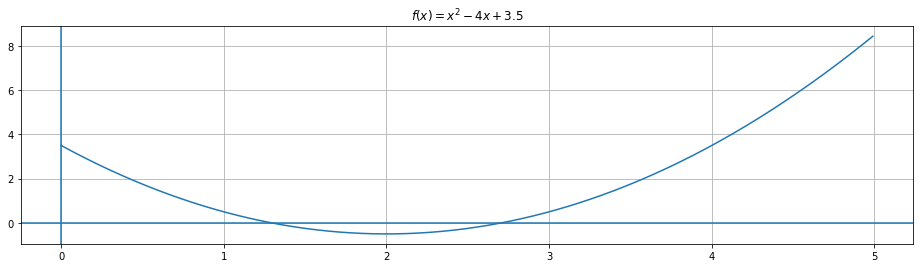

In [6]:
fig, ax = plt.subplots(figsize=(16, 4))
search_range = np.arange(0, 5, 0.01)
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x) = x^2 - 4x + 3.5$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

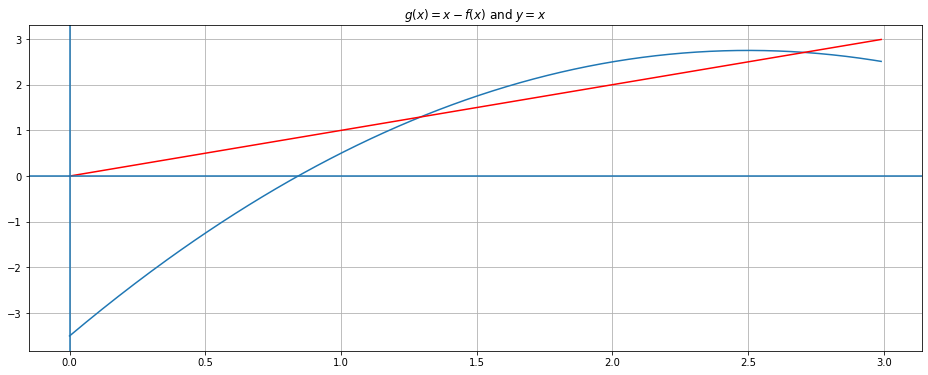

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
search_range = np.arange(0, 3, 0.01)
ax.plot(search_range, g(search_range))
ax.plot(search_range, search_range, color = 'r')
ax.set_title(r'$g(x) = x - f(x)$ and $y = x$')
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

## Test

In [8]:
my_initial_point = 2.5                  # You can choose the point in [0.5, 2.5]

solution, history = fixed_point(
    g,
    my_initial_point,
    tolerance=1e-7,
    max_iterations=100,
    report_history=True,
)
print(solution)

Found solution after 17 iterations.
2.707106815487192


### Find the exact solution

In [9]:
print('The exact solutin is ', np.roots([1, -4, 3.5]))
error = np.inf
for root in np.roots([1, -4, 3.5]):
    if abs(root - solution) < error:
        exact_solution = root
        error = abs(root - solution)
print('The error is', abs(solution - exact_solution))

The exact solutin is  [2.70710678 1.29289322]
The error is 3.430064454690296e-08


## Error Analysis

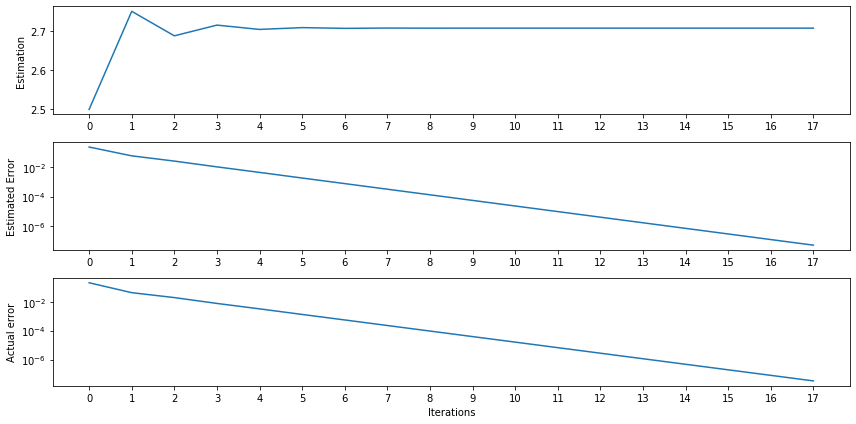

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(12, 6))
ax1, ax2, ax3 = axes

num_iterations = len(history['estimation'])
iterations = range(num_iterations)
for ax in axes:
    ax.set_xticks(iterations)

# Plot the estimation in history
ax1.plot(iterations, history['estimation'])
ax1.set_ylabel('Estimation')

# Plot the estimation error (log(error)) in history
ax2.plot(iterations, history['error'])
ax2.set_ylabel('Estimated Error')
ax2.set_yscale('log')

# Plot the estimation actual error (estimation - exact solution) in history
actual_error = np.abs(history['estimation']-exact_solution)
ax3.plot(iterations, actual_error)
ax3.set_ylabel('Actual error')
ax3.set_yscale('log')
ax3.set_xlabel('Iterations')

plt.tight_layout()
plt.show()

## End